In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import cmasher as cmr
import functions as fn
import plotting_scripts as ps


In [3]:
nonzero_shear = 2
shears = [(0.0, 0.0), (nonzero_shear, 1.5), (0.0, nonzero_shear*2)]  # Example shears

# Parameters
n_points = 500
center = (0, 0)
clusters = [
    {'center': center, 'n_points': n_points, 'spread': 0.5},  # Tight
    {'center': center, 'n_points': n_points, 'spread': 1.5},  # Medium
    {'center': center, 'n_points': n_points, 'spread': 6}   # Very loose
]

bins = np.linspace(0, 2.0, 30)

# Generate clusters (same center, different spread)
points = [fn.generate_cluster(cl['center'], cl['n_points'], cl['spread'], seed=i)
          for i, cl in enumerate(clusters)]
spreads = [cl['spread'] for cl in clusters]  # for labeling

# Shared bounds for RR only
x_all = np.concatenate([x for x, y in points])
y_all = np.concatenate([y for x, y in points])
bounds = ((x_all.min(), x_all.max()), (y_all.min(), y_all.max()))


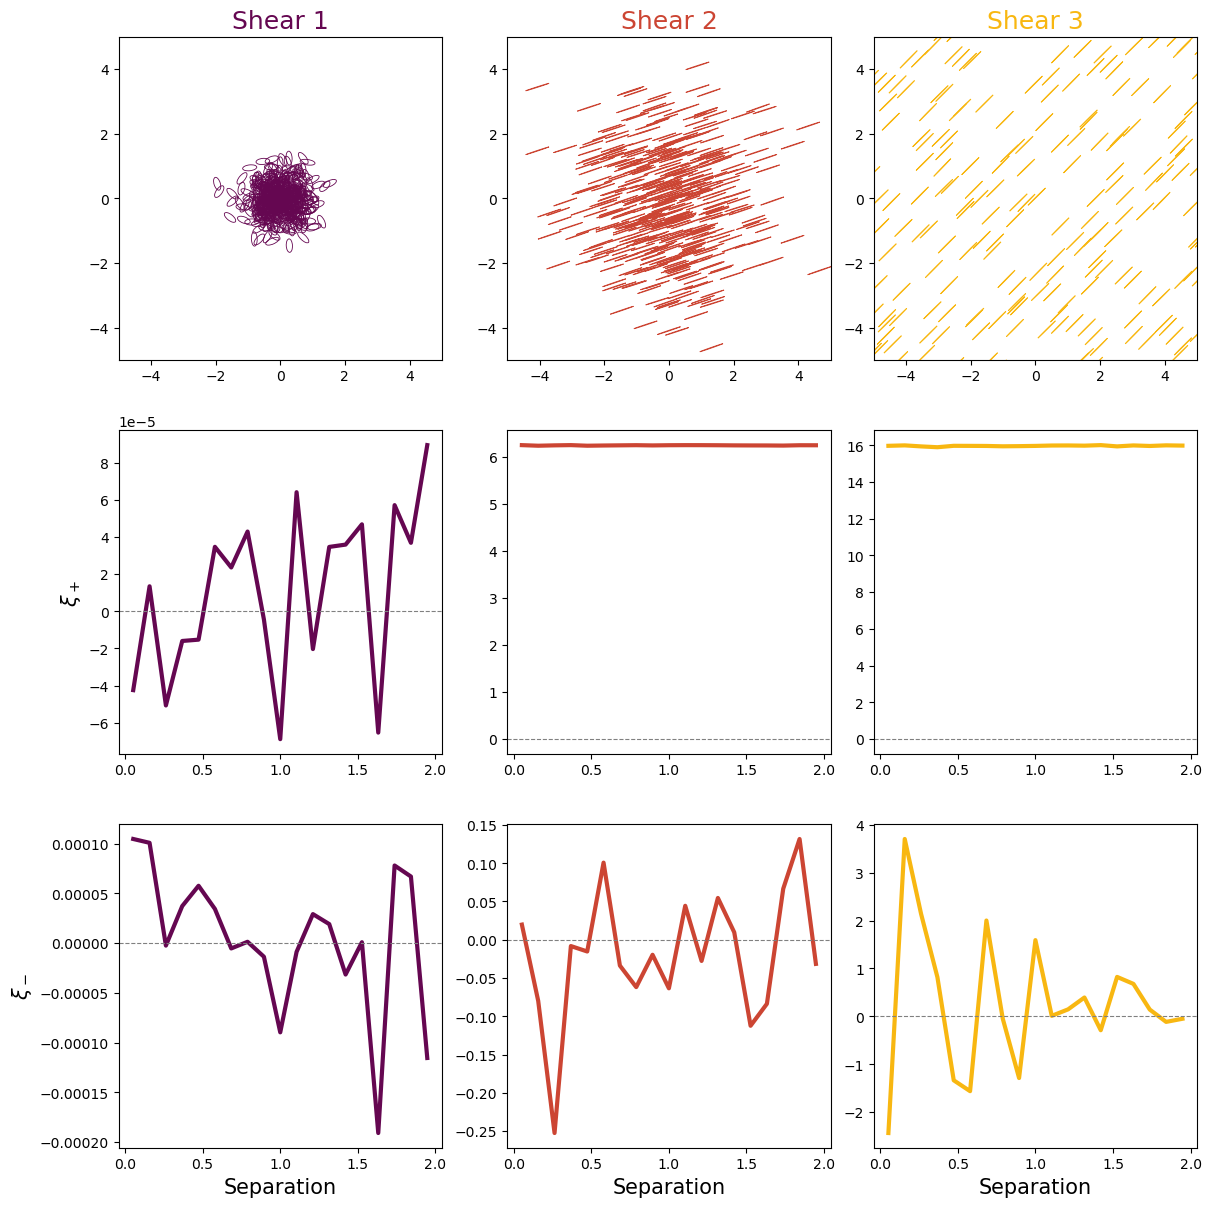

In [4]:
box_size = 5
xlim_fixed = (-box_size, box_size)
ylim_fixed = (-box_size, box_size)
bins = np.linspace(0, 2.0, 20)
colors = cmr.take_cmap_colors('cmr.pride_r', len(points), cmap_range=(0.1, 0.45), return_fmt='hex')
lw = 3
labelsize = 15
style = "ellipse"
scale = 0.2
stretch = 2

fig, axs = plt.subplots(3, 3, figsize=(12, 12),
                        constrained_layout=True,
                        gridspec_kw={'wspace': 0.01, 'hspace': 0.01})


for i, (x, y) in enumerate(points):
    color = colors[i]
    e1, e2 = fn.add_shapes(x, shear=shears[i])

    # Compute xi+, xi-
    r, etet, exex = fn.compute_tangential_and_cross(x, y, e1, e2)
    r_centers, xi_plus, xi_minus = fn.bin_2pcf(r, etet, exex, bins)

    # Top row: Shape field
    ps.plot_shapes(x, y, e1, e2, axs[0, i], style=style, scale=scale, color=color, stretch=stretch)
    axs[0, i].set_xlim(xlim_fixed)
    axs[0, i].set_ylim(ylim_fixed)
    axs[0, i].set_box_aspect(1)
    axs[0, i].set_title(f"Shear {i+1}", color=color, fontsize=labelsize + 3)

    # Middle row: xi+
    axs[1, i].plot(r_centers, xi_plus, color=color, lw=lw)
    axs[1, i].set_ylabel(r"$\xi_+$", fontsize=labelsize)
    axs[1, i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
    axs[1, i].set_box_aspect(1)

    # Bottom row: xi-
    axs[2, i].plot(r_centers, xi_minus, color=color, lw=lw)
    axs[2, i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
    axs[2, i].set_ylabel(r"$\xi_-$", fontsize=labelsize)
    axs[2, i].set_xlabel("Separation", fontsize=labelsize)
    axs[2, i].set_box_aspect(1)

    # Remove redundant labels for 2nd/3rd column
    if i > 0:
        axs[0, i].set_ylabel("")
        axs[1, i].set_ylabel("")
        axs[2, i].set_ylabel("")

plt.savefig(f"plots_output/xi_shear_configs_{style}.png", dpi=300, bbox_inches='tight')
plt.show()


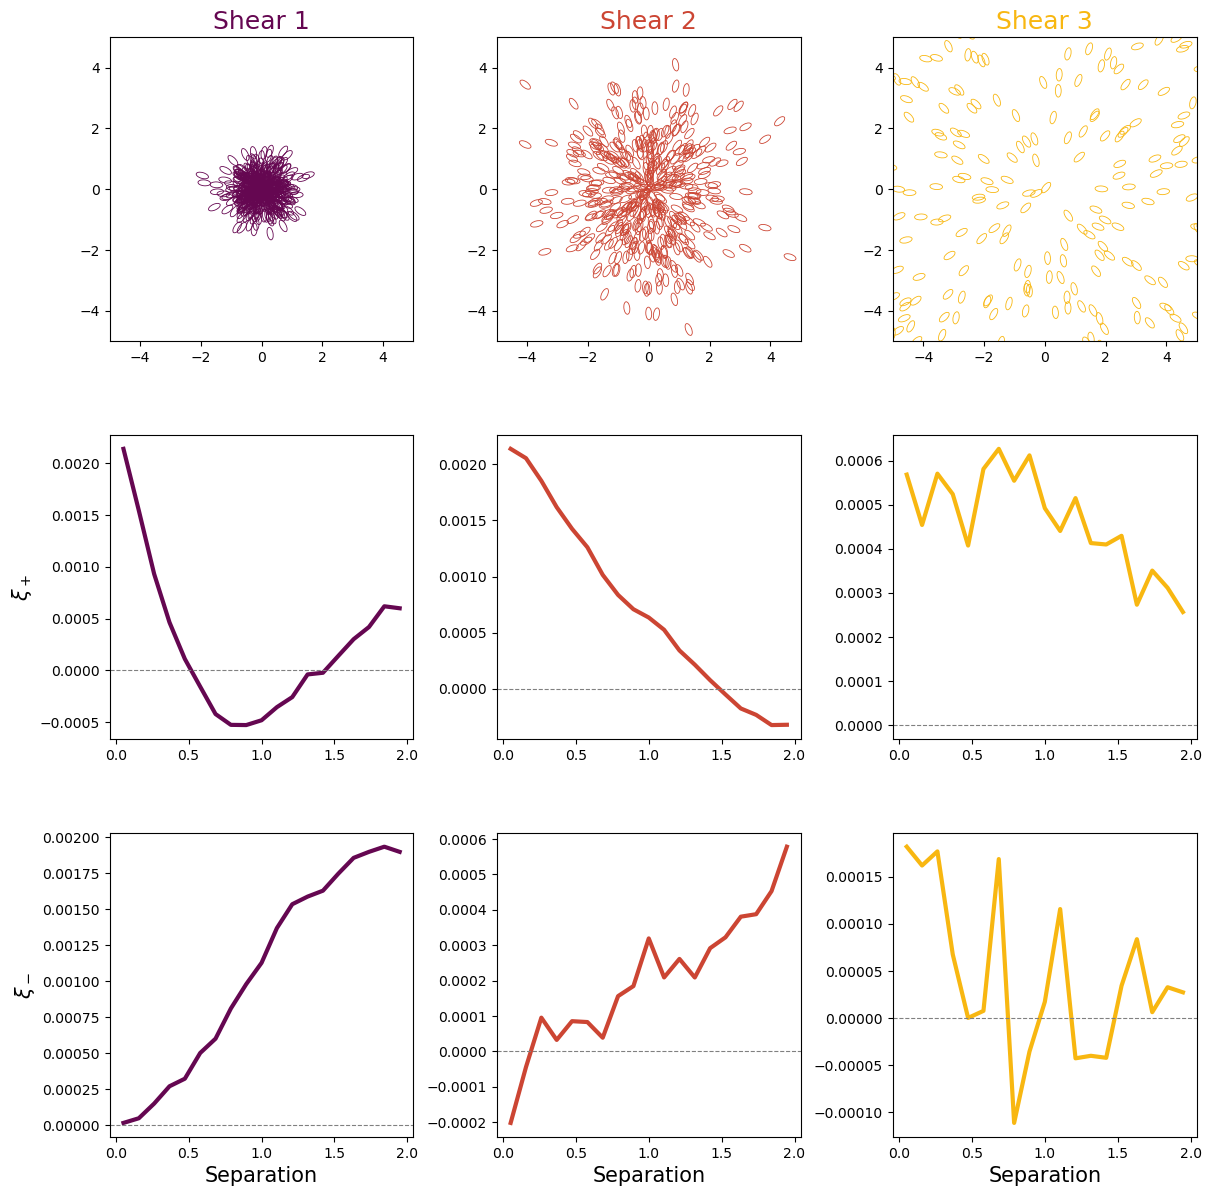

In [5]:
box_size = 5
xlim_fixed = (-box_size, box_size)
ylim_fixed = (-box_size, box_size)
bins = np.linspace(0, 2.0, 20)
colors = cmr.take_cmap_colors('cmr.pride_r', len(points), cmap_range=(0.1, 0.45), return_fmt='hex')
lw = 3
labelsize = 15
style = "ellipse"
mode = "radial"
scale = 0.2
stretch = 2

fig, axs = plt.subplots(3, 3, figsize=(12, 12),
                        constrained_layout=True,
                        gridspec_kw={'wspace': 0.01, 'hspace': 0.01})


for i, (x, y) in enumerate(points):
    color = colors[i]
    e1, e2 = fn.assign_realistic_shear(x, y, center=(0, 0), amplitude=0.05, sigma=4.0,
                             mode=mode, noise_std=0.01)

    # Compute xi+, xi-
    r, etet, exex = fn.compute_tangential_and_cross(x, y, e1, e2)
    r_centers, xi_plus, xi_minus = fn.bin_2pcf(r, etet, exex, bins)

    # Top row: Shape field
    ps.plot_shapes(x, y, e1, e2, axs[0, i], style=style, scale=scale, color=color, stretch=stretch)
    axs[0, i].set_xlim(xlim_fixed)
    axs[0, i].set_ylim(ylim_fixed)
    axs[0, i].set_box_aspect(1)
    axs[0, i].set_title(f"Shear {i+1}", color=color, fontsize=labelsize + 3)

    # Middle row: xi+
    axs[1, i].plot(r_centers, xi_plus, color=color, lw=lw)
    axs[1, i].set_ylabel(r"$\xi_+$", fontsize=labelsize)
    axs[1, i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
    axs[1, i].set_box_aspect(1)

    # Bottom row: xi-
    axs[2, i].plot(r_centers, xi_minus, color=color, lw=lw)
    axs[2, i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
    axs[2, i].set_ylabel(r"$\xi_-$", fontsize=labelsize)
    axs[2, i].set_xlabel("Separation", fontsize=labelsize)
    axs[2, i].set_box_aspect(1)

    # Remove redundant labels for 2nd/3rd column
    if i > 0:
        axs[0, i].set_ylabel("")
        axs[1, i].set_ylabel("")
        axs[2, i].set_ylabel("")


plt.savefig(f"plots_output/xi_shear_configs_realistic_{mode}_{style}.png", dpi=300, bbox_inches='tight')
plt.show()
